In [23]:
from sklearn.utils.estimator_checks import check_estimator

In [31]:
import sys
sys.path.append("..")

from eql.est import EQL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [ ]:
# for e,c in check_estimator(EQL(), generate_only=True):
#     try:
#         c(e)
#     except Exception as e:
#         print(e)

In [ ]:
e = EQL(n_iter=10_000, drop_rate=.15)
hp = {'reg': (1e-3, 1e-2, 1e-1, 1e-0, 1e1),
      'n_layers': (1,2),
      'functions':('id;mul;cos;square;cube',
                   'id;cos;div;mul;sin',
                   #'id;sqrt;mul;exp;log;mul;id',
                   #id;mul;cos;div;sqrt;cos;sin;cos;mul;mul;cos;id',
                   #'id;mul;cos;div;sqrt;cos;sin;cos;mul;mul;cos;id;id;mul;cos;div;sqrt;cos;sin;cos;mul;mul;cos;id'
                  )}

In [ ]:
cv = GridSearchCV(estimator=e,
                 param_grid=hp,
                 cv=2,
                 #refit=True,
                 n_jobs=4,
                 verbose=4)

In [ ]:
cv.fit(x[:,None], y)
cv.score(x[:,None], y)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


/home/alessandro/code/NeuralSymbolicRegressionThatScales/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/alessandro/code/NeuralSymbolicRegressionThatScales/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/alessandro/code/NeuralSymbolicRegressionThatScales/env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/alessandro/code/eql_jax/est.py", line 155, in score
    return self.get_score(X, y, self._params)
  File "/home/alessandro/code/eql_jax/est.py", line 148, in get_score
    return r2 + np.clip(np.mean(simps), a_min=0.0)
  File "<__array_function__ internals>", line 4, in clip
TypeError: _cli

/home/alessandro/code/NeuralSymbolicRegressionThatScales/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/alessandro/code/NeuralSymbolicRegressionThatScales/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/alessandro/code/NeuralSymbolicRegressionThatScales/env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/alessandro/code/eql_jax/est.py", line 155, in score
    return self.get_score(X, y, self._params)
  File "/home/alessandro/code/eql_jax/est.py", line 148, in get_score
    return r2 + np.clip(np.mean(simps), a_min=0.0)
  File "<__array_function__ internals>", line 4, in clip
TypeError: _cli

/home/alessandro/code/NeuralSymbolicRegressionThatScales/env/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
  warnings.warn(


DeviceArray(1.172192, dtype=float32)

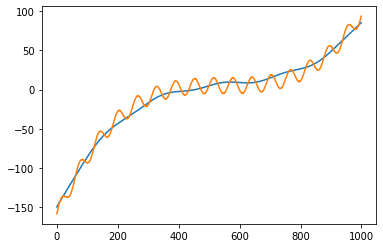

In [ ]:
plt.plot(cv.best_estimator_.predict(x[:,None]))
plt.plot(y)

In [ ]:
cv.best_estimator_.get_eqn()

[0.317*x0 - 0.178*(0.131*x0 - 1.56)*(0.633*x0 - 0.198) + 0.00299*(0.23*x0 - 0.02)*(x0 - 0.089)**2 - 2.25*cos(0.314*x0 + 1.58) + 4.78]

[CV 2/2] END functions=id;mul;cos;square;cube, n_layers=1, reg=0.001;, score=nan total time=  42.2s
[CV 2/2] END functions=id;mul;cos;square;cube, n_layers=1, reg=0.001;, score=nan total time=  45.0s
[CV 2/2] END functions=id;mul;cos;square;cube, n_layers=1, reg=0.01;, score=nan total time=  46.2s
[CV 1/2] END functions=id;mul;cos;square;cube, n_layers=2, reg=0.001;, score=nan total time= 1.7min
[CV 2/2] END functions=id;mul;cos;square;cube, n_layers=2, reg=0.001;, score=nan total time= 1.3min
[CV 2/2] END functions=id;mul;cos;square;cube, n_layers=2, reg=0.1;, score=nan total time= 1.4min
[CV 1/2] END functions=id;cos;div;mul;sin, n_layers=1, reg=0.1;, score=nan total time=  47.0s
[CV 1/2] END functions=id;cos;div;mul;sin, n_layers=1, reg=0.01;, score=nan total time=  48.1s
[CV 1/2] END functions=id;cos;div;mul;sin, n_layers=2, reg=0.001;, score=nan total time= 1.3min
[CV 2/2] END functions=id;cos;div;mul;sin, n_layers=2, reg=0.1;, score=nan total time= 1.5min
[CV 1/2] END functions=i

/home/alessandro/code/NeuralSymbolicRegressionThatScales/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/alessandro/code/NeuralSymbolicRegressionThatScales/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/alessandro/code/NeuralSymbolicRegressionThatScales/env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/alessandro/code/eql_jax/est.py", line 155, in score
    return self.get_score(X, y, self._params)
  File "/home/alessandro/code/eql_jax/est.py", line 148, in get_score
    return r2 + np.clip(np.mean(simps), a_min=0.0)
  File "<__array_function__ internals>", line 4, in clip
TypeError: _cli

[CV 2/2] END functions=id;mul;cos;square;cube, n_layers=1, reg=0.01;, score=nan total time=  41.8s
[CV 1/2] END functions=id;mul;cos;square;cube, n_layers=1, reg=0.001;, score=nan total time=  47.2s
[CV 1/2] END functions=id;mul;cos;square;cube, n_layers=1, reg=0.1;, score=nan total time=  47.6s
[CV 2/2] END functions=id;mul;cos;square;cube, n_layers=2, reg=0.001;, score=nan total time= 1.1min
[CV 1/2] END functions=id;mul;cos;square;cube, n_layers=2, reg=0.1;, score=nan total time= 1.1min
[CV 1/2] END functions=id;mul;cos;square;cube, n_layers=2, reg=0.01;, score=nan total time= 1.3min
[CV 2/2] END functions=id;cos;div;mul;sin, n_layers=1, reg=0.001;, score=nan total time=  47.9s
[CV 2/2] END functions=id;cos;div;mul;sin, n_layers=1, reg=0.1;, score=nan total time=  46.9s
[CV 2/2] END functions=id;cos;div;mul;sin, n_layers=1, reg=0.01;, score=nan total time=  47.1s
[CV 2/2] END functions=id;cos;div;mul;sin, n_layers=2, reg=0.001;, score=nan total time= 1.2min
[CV 1/2] END functions=id

/home/alessandro/code/NeuralSymbolicRegressionThatScales/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/alessandro/code/NeuralSymbolicRegressionThatScales/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/alessandro/code/NeuralSymbolicRegressionThatScales/env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/alessandro/code/eql_jax/est.py", line 155, in score
    return self.get_score(X, y, self._params)
  File "/home/alessandro/code/eql_jax/est.py", line 148, in get_score
    return r2 + np.clip(np.mean(simps), a_min=0.0)
  File "<__array_function__ internals>", line 4, in clip
TypeError: _cli

[CV 1/2] END functions=id;mul;cos;square;cube, n_layers=1, reg=0.001;, score=nan total time=  41.1s
[CV 1/2] END functions=id;mul;cos;square;cube, n_layers=1, reg=0.1;, score=nan total time=  46.0s
[CV 1/2] END functions=id;mul;cos;square;cube, n_layers=1, reg=0.01;, score=nan total time=  56.6s
[CV 2/2] END functions=id;mul;cos;square;cube, n_layers=2, reg=0.01;, score=nan total time= 1.5min
[CV 1/2] END functions=id;mul;cos;square;cube, n_layers=2, reg=0.001;, score=nan total time= 1.2min
[CV 1/2] END functions=id;mul;cos;square;cube, n_layers=2, reg=0.1;, score=nan total time= 1.4min
[CV 2/2] END functions=id;cos;div;mul;sin, n_layers=1, reg=0.01;, score=nan total time=  47.4s
[CV 2/2] END functions=id;cos;div;mul;sin, n_layers=1, reg=0.001;, score=nan total time=  47.8s
[CV 2/2] END functions=id;cos;div;mul;sin, n_layers=1, reg=0.1;, score=nan total time=  50.4s
[CV 2/2] END functions=id;cos;div;mul;sin, n_layers=2, reg=0.01;, score=nan total time= 1.5min
[CV 2/2] END functions=id;

/home/alessandro/code/NeuralSymbolicRegressionThatScales/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/alessandro/code/NeuralSymbolicRegressionThatScales/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/alessandro/code/NeuralSymbolicRegressionThatScales/env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/alessandro/code/eql_jax/est.py", line 155, in score
    return self.get_score(X, y, self._params)
  File "/home/alessandro/code/eql_jax/est.py", line 148, in get_score
    return r2 + np.clip(np.mean(simps), a_min=0.0)
  File "<__array_function__ internals>", line 4, in clip
TypeError: _cli

In [ ]:
nsample = 1000
sig = 0.2
x = np.linspace(-50, 50, nsample)
X = np.column_stack((x/5, 10*np.sin(x), (x-5)**3, np.ones(nsample)))
beta = [0.01, 1, 0.001, 5.]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)
df = pd.DataFrame()
df['x']=x
df['y']=y

In [ ]:
e.fit(x[:,None], y)
e.score(x[:,None], y)

-1.2717832811362317 [0.6]


-0.763069968681739

In [ ]:
e.get_eqn()

[0.067565732826431*x0**2 + 1.16105883578361*x0 - 9.63120857199966]

In [ ]:
e.score(x[:,None], y)

0.9397188087541153

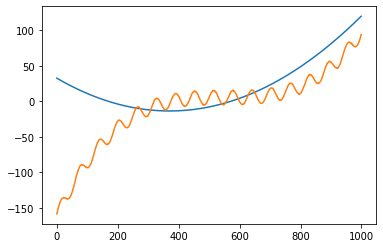

In [ ]:
plt.plot(e.predict(x[:,None]))
plt.plot(y)